In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyam
import pandas as pd
version = "v10_ssp245harm"

<IPython.core.display.Javascript object>

In [2]:
meta = pd.read_excel("../input/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx", sheet_name="meta_Ch3vetted_withclimate")
meta

,Model,Scenario,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,...,P67 peak warming (FaIRv1.6.2),Median warming in 2100 (FaIRv1.6.2),Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb,Category_color_hex
0,AIM/CGE 2.0,SSP1-26,C3,C3: limit warming to 2°C (>67%),C3y_+veGHGs,Limit to 2C (>67%) immediate 2020 action,C3,non-IMP,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,1.717124,1.536621,2070,0.599911,0.121591,0.001788,NaN,NaN,"111, 120, 153",6F7899
1,AIM/CGE 2.0,SSP1-34,C5,C5: limit warming to 2.5°C (>50%),C5,NaN,C5,non-IMP,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2.144655,1.962484,2100,0.931158,0.463120,0.022351,NaN,NaN,"140, 167, 208",8CA7D0
2,AIM/CGE 2.0,SSP1-45,C6,C6: limit warming to 3°C (>50%),C6,NaN,C6,non-IMP,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2.629060,2.405440,2100,0.996424,0.836388,0.144837,NaN,NaN,"250, 193, 130",FAC182
3,AIM/CGE 2.0,SSP1-Baseline,C7,C7: limit warming to 4°C (>50%),C7,NaN,C7,non-IMP,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P1a,...,3.270344,3.002760,2100,1.000000,0.990612,0.502012,NaN,NaN,"241, 136, 114",F18872
4,AIM/CGE 2.0,SSP4-26,C3,C3: limit warming to 2°C (>67%),C3y_+veGHGs,Limit to 2C (>67%) immediate 2020 action,C3,non-IMP,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,1.678820,1.496835,2070,0.580688,0.082700,0.000447,NaN,NaN,"111, 120, 153",6F7899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,WITCH-GLOBIOM 4.4,CD-LINKS_NPi,C7,C7: limit warming to 4°C (>50%),C7,NaN,C7,non-IMP,https://doi.org/10.1007/s10584-020-02837-9,P1b,...,3.954603,3.639530,2100,1.000000,0.999553,0.863210,NaN,NaN,"241, 136, 114",F18872
1198,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1000,C1,C1: limit warming to 1.5°C (>50%) with no or l...,C1a_NZGHGs,Limit to 1.5C (>50%) no or low OS immediate 20...,C1,non-IMP,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,1.582366,1.377366,2070,0.446133,0.060796,0.000894,NaN,NaN,"151, 206, 228",97CEE4
1199,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,C3,C3: limit warming to 2°C (>67%),C3y_+veGHGs,Limit to 2C (>67%) immediate 2020 action,C3,non-IMP,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,1.840110,1.662531,2095,0.718373,0.204738,0.005364,NaN,NaN,"111, 120, 153",6F7899
1200,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,C1,C1: limit warming to 1.5°C (>50%) with no or l...,C1a_NZGHGs,Limit to 1.5C (>50%) no or low OS immediate 20...,C1,non-IMP,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,1.492339,1.090956,2028,0.314707,0.017434,0.000000,NaN,NaN,"151, 206, 228",97CEE4


In [3]:
meta = meta.rename(columns={"Model": "model", "Scenario": "scenario"}).set_index(["model", "scenario"])

In [4]:
meta.IMP_marker.unique()

array(['non-IMP', 'Neg-2.0', 'Neg', 'CurPol', 'ModAct', 'LD', 'Ren-2.0',
       'SP', 'Ren', 'GS'], dtype=object)

In [5]:
ar6 = pyam.IamDataFrame("../input/AR6_Scenarios_Database_World_v1.1.csv", meta=meta)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\input\AR6_Scenarios_Database_World_v1.1.csv


In [6]:
ar6.meta

Category  \
model             scenario                                   
AIM/CGE 2.0       SSP1-26                               C3   
                  SSP1-34                               C5   
                  SSP1-45                               C6   
                  SSP1-Baseline                         C7   
                  SSP4-26                               C3   
...                                                    ...   
WITCH-GLOBIOM 4.2 EMF30_Slower-Action                  NaN   
                  EMF30_Slower-Action+SLCF             NaN   
                  EMF30_Slower-to-faster               NaN   
                  EMF30_Slower-to-faster+SLCF          NaN   
                  EMF30_Slower-to-faster+SLCF+HFC      NaN   

                                                                       Category_name  \
model             scenario                                                             
AIM/CGE 2.0       SSP1-26                            C3: limit warming to 2°C (>67%)   
                  SSP1-34                          C5: limit warming to 2.5°C (>50%)   
                  SSP1-45                            C6: limit warming to 3°C (>50%)   
                  SSP1-Baseline                      C7: limit warming to 4°C (>50%)   
                  SSP4-26                            C3: limit warming to 2°C (>67%)   
...                                                                              ...   
WITCH-GLOBIOM 4.2 EMF30_Slower-Action                                            NaN   
                  EMF30_Slower-Action+SLCF                                       NaN   
                  EMF30_Slower-to-faster                                         NaN   
                  EMF30_Slower-to-faster+SLCF                                    NaN   
                  EMF30_Slower-to-faster+SLCF+HFC                                NaN   

                                                  Category_subset  \
model             scenario                                          
AIM/CGE 2.0       SSP1-26                             C3y_+veGHGs   
                  SSP1-34                                      C5   
                  SSP1-45                                      C6   
                  SSP1-Baseline                                C7   
                  SSP4-26                             C3y_+veGHGs   
...                                                           ...   
WITCH-GLOBIOM 4.2 EMF30_Slower-Action                         NaN   
                  EMF30_Slower-Action+SLCF                    NaN   
                  EMF30_Slower-to-faster                      NaN   
                  EMF30_Slower-to-faster+SLCF                 NaN   
                  EMF30_Slower-to-faster+SLCF+HFC             NaN   

                                                                                 Subset_Ch4  \
model             scenario                                                                    
AIM/CGE 2.0       SSP1-26                          Limit to 2C (>67%) immediate 2020 action   
                  SSP1-34                                                               NaN   
                  SSP1-45                                                               NaN   
                  SSP1-Baseline                                                         NaN   
                  SSP4-26                          Limit to 2C (>67%) immediate 2020 action   
...                                                                                     ...   
WITCH-GLOBIOM 4.2 EMF30_Slower-Action                                                   NaN   
                  EMF30_Slower-Action+SLCF                                              NaN   
                  EMF30_Slower-to-faster                                                NaN   
                  EMF30_Slower-to-faster+SLCF                                           NaN   
                  EMF30_Slower-to-faster+SLCF+HFC           

In [7]:
imps = ar6.filter(IMP_marker=[i for i in meta.IMP_marker.unique() if i != 'non-IMP']).interpolate(2015)

In [8]:
imps

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.2, COFFEE 1.1, GCAM 5.3, IMAGE 3.0, ... WITCH 5.0 (9)
 * scenario : CO_Bridge, DeepElec_SSP2_ HighRE_Budg900, ... SusDev_SDP-PkBudg1000 (9)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1105)
   unit     : %, EJ/yr, GW, GW/yr, GWh, GWh/yr, Index (2010 = 1), ... years (57)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C3, C7, C6, C1 (4)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (4)
   Category_subset (object) C3x_NZGHGs, C7, C6, C1a_NZGHGs, C1b_+veGHGs (5)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (3)
   Category_Vetting_historical (object) C3, C7, C6, C1 (4)
   ...

In [10]:
imps.filter(variable="Carbon Sequestration|*", level=0).variable

['Carbon Sequestration|CCS',
 'Carbon Sequestration|Direct Air Capture',
 'Carbon Sequestration|Land Use',
 'Carbon Sequestration|Other',
 'Carbon Sequestration|Enhanced Weathering']

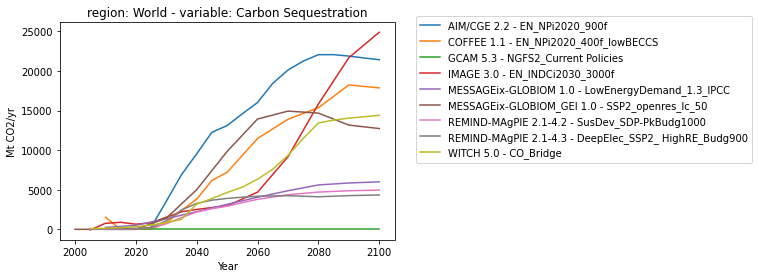

In [11]:
seq = imps.aggregate("Carbon Sequestration", imps.filter(variable="Carbon Sequestration|*", level=0).variable)
seq.plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

In [9]:
co2 = "Emissions|CO2"
co2afolu = "Emissions|CO2|AFOLU"
co2eni = "Emissions|CO2|Energy and Industrial Processes"

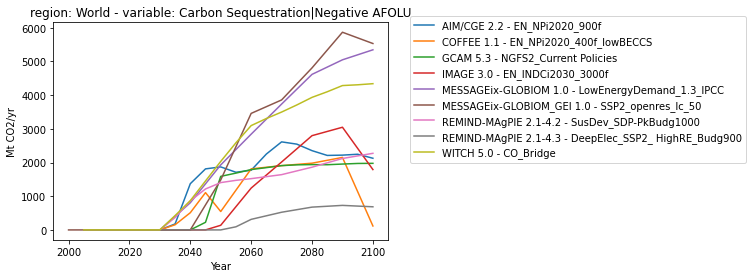

In [12]:
negAFOLU = "Carbon Sequestration|Negative AFOLU"
negafoludata = imps.filter(variable=co2afolu).timeseries()
negafoludata = -1 * negafoludata.combine(0 * negafoludata, np.minimum)
negafoludata = negafoludata.reset_index()
negafoludata["variable"] = negAFOLU
negafoludata = pyam.IamDataFrame(negafoludata)
negafoludata.plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

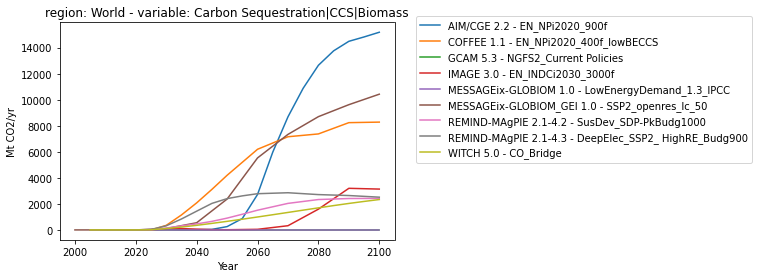

In [13]:
imps.filter(variable="Carbon Sequestration|CCS|Biomass").plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

In [14]:
negafoludata.variable

['Carbon Sequestration|Negative AFOLU']

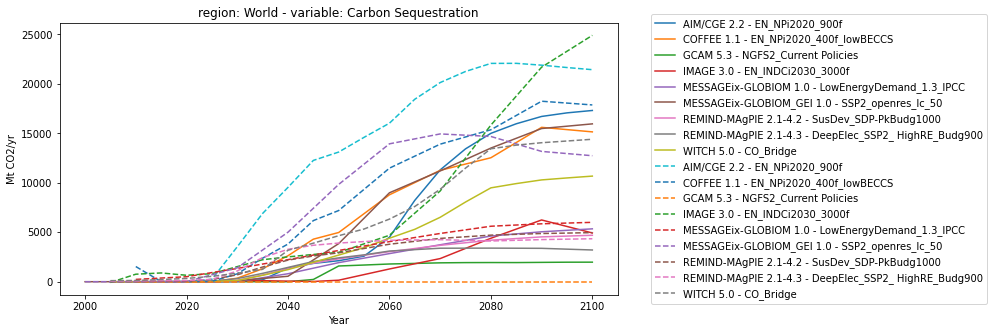

In [15]:
nonpointCS = "Carbon Sequestration|Non-point"
nonpointCSdf = pyam.concat([imps, negafoludata])
nonpointCSdf = nonpointCSdf.aggregate(nonpointCS, [
    "Carbon Sequestration|CCS|Biomass", 
    "Carbon Sequestration|Direct Air Capture", 
    "Carbon Sequestration|Enhanced Weathering", 
    "Carbon Sequestration|Other",
    negAFOLU
])
nonpointCSdf.meta = imps.meta
plt.figure(figsize=(10, 5))
ax = plt.subplot()
nonpointCSdf.plot(ax=ax)
seq.filter(variable="Carbon Sequestration").plot(linestyle="--", ax=ax)
ax.set_prop_cycle(None)
plt.legend(bbox_to_anchor=(1.05, 1.05))

In [16]:
seq.filter(year=2100).timeseries()

,,,,,2100
model,scenario,region,variable,unit,
AIM/CGE 2.2,EN_NPi2020_900f,World,Carbon Sequestration,Mt CO2/yr,21432.455200
COFFEE 1.1,EN_NPi2020_400f_lowBECCS,World,Carbon Sequestration,Mt CO2/yr,17868.397010
GCAM 5.3,NGFS2_Current Policies,World,Carbon Sequestration,Mt CO2/yr,0.000771
IMAGE 3.0,EN_INDCi2030_3000f,World,Carbon Sequestration,Mt CO2/yr,24902.070485
MESSAGEix-GLOBIOM 1.0,LowEnergyDemand_1.3_IPCC,World,Carbon Sequestration,Mt CO2/yr,6000.626173
MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_50,World,Carbon Sequestration,Mt CO2/yr,12734.799670
REMIND-MAgPIE 2.1-4.2,SusDev_SDP-PkBudg1000,World,Carbon Sequestration,Mt CO2/yr,4961.201800
REMIND-MAgPIE 2.1-4.3,DeepElec_SSP2_ HighRE_Budg900,World,Carbon Sequestration,Mt CO2/yr,4343.580600
WITCH 5.0,CO_Bridge,World,Carbon Sequestration,Mt CO2/yr,14398.636788


In [17]:
seq.meta["IMP_marker"]

model                      scenario                     
AIM/CGE 2.2                EN_NPi2020_900f                  Neg-2.0
COFFEE 1.1                 EN_NPi2020_400f_lowBECCS             Neg
GCAM 5.3                   NGFS2_Current Policies            CurPol
IMAGE 3.0                  EN_INDCi2030_3000f                ModAct
MESSAGEix-GLOBIOM 1.0      LowEnergyDemand_1.3_IPCC              LD
MESSAGEix-GLOBIOM_GEI 1.0  SSP2_openres_lc_50               Ren-2.0
REMIND-MAgPIE 2.1-4.2      SusDev_SDP-PkBudg1000                 SP
REMIND-MAgPIE 2.1-4.3      DeepElec_SSP2_ HighRE_Budg900        Ren
WITCH 5.0                  CO_Bridge                             GS
Name: IMP_marker, dtype: object

In [18]:
imps.filter(variable="Emissions|Kyo*").timeseries()[2100]

model                      scenario                       region  variable               unit           
AIM/CGE 2.2                EN_NPi2020_900f                World   Emissions|Kyoto Gases  Mt CO2-equiv/yr    -2864.131900
COFFEE 1.1                 EN_NPi2020_400f_lowBECCS       World   Emissions|Kyoto Gases  Mt CO2-equiv/yr    -5692.140031
GCAM 5.3                   NGFS2_Current Policies         World   Emissions|Kyoto Gases  Mt CO2-equiv/yr    66801.277670
IMAGE 3.0                  EN_INDCi2030_3000f             World   Emissions|Kyoto Gases  Mt CO2-equiv/yr    30576.810547
MESSAGEix-GLOBIOM 1.0      LowEnergyDemand_1.3_IPCC       World   Emissions|Kyoto Gases  Mt CO2-equiv/yr     1015.920810
MESSAGEix-GLOBIOM_GEI 1.0  SSP2_openres_lc_50             World   Emissions|Kyoto Gases  Mt CO2-equiv/yr    -6669.342871
REMIND-MAgPIE 2.1-4.2      SusDev_SDP-PkBudg1000          World   Emissions|Kyoto Gases  Mt CO2-equiv/yr     -985.143200
REMIND-MAgPIE 2.1-4.3      DeepElec_SSP2_ HighRE

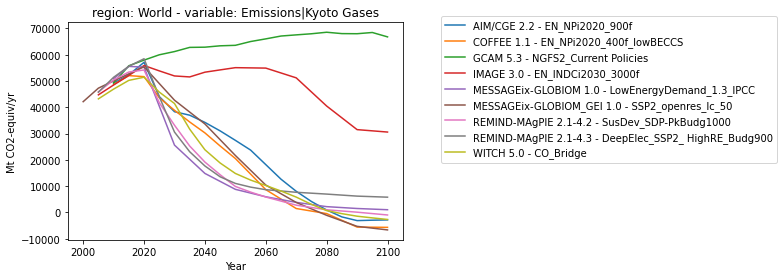

In [19]:
imps.filter(variable="Emissions|Kyo*").plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [20]:
ar6.filter(IMP_marker="Neg", variable="Carbon Sequestration|*").timeseries()

2010  \
model      scenario                 region variable                                           unit                 
COFFEE 1.1 EN_NPi2020_400f_lowBECCS World  Carbon Sequestration|CCS                           Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Biomass                   Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply     Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Fossil                    Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply      Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|E... Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|G... Mt CO2/yr     0.00   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|L... Mt CO2/yr     0.00   
                                           Carbon Sequestration|Direct Air Capture            Mt CO2/yr     0.00   
                                           Carbon Sequestration|Land Use                      Mt CO2/yr  1532.52   
                                           Carbon Sequestration|Other                         Mt CO2/yr     0.00   

                                                                                                              2015  \
model      scenario                 region variable                                           unit                   
COFFEE 1.1 EN_NPi2020_400f_lowBECCS World  Carbon Sequestration|CCS                           Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Biomass                   Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply     Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Biomass|Energy|Supply|... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Fossil                    Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply      Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|E... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|G... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|CCS|Fossil|Energy|Supply|L... Mt CO2/yr   0.000000   
                                           Carbon Sequestration|Direct Air Capture            Mt CO2/yr   0.000000   
                                           Carbon Sequestration|Land Use                      Mt CO2/yr  11.316003   
                                           Carbon Sequestration|Other                         Mt CO2/yr   0.000000   

                                                                                                             2020  \
model      scenario                 region variable                                           unit                  
COFFEE 1.1 EN_NPi2020_400f_lowBECCS World  Carbon Sequestration|CCS                           Mt CO2/yr   0.00000   
           

In [21]:
tier1 = pyam.IamDataFrame(f"../output/chosen_files/{version}/all_emissions.csv")
tier1

pyam.core - INFO: Reading file ..\output\chosen_files\v10_ssp245harm\all_emissions.csv


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : COFFEE 1.1, GCAM 5.3, IMAGE, IMAGE 3.0, ... WITCH 5.0 (9)
 * scenario : CurPol, CurPol nz 2120 decline -23800, GS, GS_NZGHG, ... ssp534-over (18)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|BC, Emissions|CH4, Emissions|CO, ... Emissions|VOC (24)
   unit     : Mt BC/yr, Mt CH4/yr, Mt CO/yr, Mt CO2-equiv/yr, ... kt SF6/yr (23)
   year     : 2015, 2020, 2030, 2040, 2050, 2060, 2070, 2075, ... 2300 (33)
Meta indicators:
   exclude (bool) False (1)

In [22]:
tier1co2 = tier1.aggregate(co2, [co2afolu, co2eni])
tier1co2

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : COFFEE 1.1, GCAM 5.3, IMAGE, IMAGE 3.0, ... WITCH 5.0 (9)
 * scenario : CurPol, CurPol nz 2120 decline -23800, GS, GS_NZGHG, ... ssp534-over (18)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CO2 (1)
   unit     : Mt CO2/yr (1)
   year     : 2015, 2020, 2030, 2040, 2050, 2060, 2070, 2075, ... 2300 (33)
Meta indicators:
   exclude (bool) False (1)

In [23]:
impsco2 = imps.filter(variable=[co2afolu, co2eni]).aggregate(co2)

In [24]:
sr15 = pyam.IamDataFrame("../input/complete_sr15.csv")

pyam.core - INFO: Reading file ..\input\complete_sr15.csv


In [25]:
rcmip = pyam.IamDataFrame("../input/rcmip-emissions-annual-means-v5-1-0.csv")

pyam.core - INFO: Reading file ..\input\rcmip-emissions-annual-means-v5-1-0.csv


In [26]:
chosenssps = ar6.filter(scenario=["*5-85*", "*1-19*"], region="World")
chosenssps.aggregate("Carbon Sequestration", ar6.filter(variable="Carbon Sequestration|*", level=0).variable)

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, GCAM 4.2, IMAGE 3.0.1, ... WITCH-GLOBIOM 3.1 (6)
 * scenario : SSP1-19 (1)
Timeseries data coordinates:
   region   : World (1)
   variable : Carbon Sequestration (1)
   unit     : Mt CO2/yr (1)
   year     : 2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, ... 2100 (11)
Meta indicators:
   Category (object) nan, C1, C2 (3)
   Category_name (object) nan, ... (3)
   Category_subset (object) nan, C1a_NZGHGs, C2 (3)
   Subset_Ch4 (object) nan, ... (2)
   Category_Vetting_historical (object) nan, C1, C2 (3)
   ...

In [27]:
chosensspsco2 = chosenssps.filter(variable=[co2afolu, co2eni]).aggregate(co2)
chosensspsco2.timeseries()

,,,,,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
model,scenario,region,variable,unit,,,,,,,,,,,
AIM/CGE 2.0,SSP1-19,World,Emissions|CO2,Mt CO2/yr,34373.934500,35782.648500,37233.889800,19057.493300,8229.320000,1794.617700,-2181.169200,-3757.079400,-4338.218800,-4390.492800,-4474.874100
GCAM 4.2,SSP1-19,World,Emissions|CO2,Mt CO2/yr,31887.314670,35775.431715,37684.359729,19308.132582,10579.887310,3262.704401,-633.599659,-4335.441436,-8420.983075,-12963.828797,-17674.166409
IMAGE 3.0.1,SSP1-19,World,Emissions|CO2,Mt CO2/yr,33166.078159,35488.826994,33208.798802,17967.967271,6413.946793,968.035871,-1649.999380,-4136.924527,-7370.204810,-10567.704358,-14340.422331
MESSAGE-GLOBIOM 1.0,SSP1-19,World,Emissions|CO2,Mt CO2/yr,37720.751194,40265.628018,38093.862677,23404.162159,14933.855842,3629.964971,-4029.742853,-8118.545609,-11932.148838,-14315.900654,-15487.081435
REMIND-MAgPIE 1.5,SSP1-19,World,Emissions|CO2,Mt CO2/yr,35252.000000,36246.000000,35205.000000,26309.000000,16411.000000,3762.000000,-6314.700000,-9558.000000,-11390.000000,-12777.000000,-13372.000000
WITCH-GLOBIOM 3.1,SSP1-19,World,Emissions|CO2,Mt CO2/yr,31922.044354,35303.387760,37312.307113,10560.008460,7435.934987,3099.936979,-695.744629,-3765.207280,-7221.593977,-9246.603193,-9648.343442


In [28]:
nonpointCSdf

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.2, COFFEE 1.1, GCAM 5.3, IMAGE 3.0, ... WITCH 5.0 (9)
 * scenario : CO_Bridge, DeepElec_SSP2_ HighRE_Budg900, ... SusDev_SDP-PkBudg1000 (9)
Timeseries data coordinates:
   region   : World (1)
   variable : Carbon Sequestration|Non-point (1)
   unit     : Mt CO2/yr (1)
   year     : 2000, 2005, 2010, 2015, 2020, 2025, 2030, 2035, ... 2100 (21)
Meta indicators:
   Category (object) C3, C7, C6, C1 (4)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (4)
   Category_subset (object) C3x_NZGHGs, C7, C6, C1a_NZGHGs, C1b_+veGHGs (5)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (3)
   Category_Vetting_historical (object) C3, C7, C6, C1 (4)
   ...

In [29]:
years = np.concatenate([np.array([2015]), np.arange(2020, 2101, 10)])
tieryears = np.arange(2110, 2301, 10)
# We also want to duplicate the intial carbon sequestration db with copies for the scenarios that diverge at later dates
seqexpanded = []
npseqexpanded = []
remainder = []
for imp in imps.meta["IMP_marker"]:
    j = [j for j in tier1.scenario if j[:len(imp)]==imp]
    if len(j)>0:
        scenco2 = tier1co2.filter(scenario=j, variable=co2).timeseries()
        tmp = -(scenco2[years] - impsco2.filter(IMP_marker=imp).timeseries()[years].values)
        for year in tieryears:
            tmp[year] = tmp.loc[:, 2100] + scenco2.loc[:, 2100] - scenco2.loc[:, year]
        remainder.append(tmp)
        for k in [k for k in j]:
            tmpseq = seq.filter(IMP_marker=imp).timeseries()
            tmpseq.index = tmpseq.index.set_levels([k], level="scenario")
            tmpnpseq = nonpointCSdf.filter(IMP_marker=imp).timeseries()
            tmpnpseq.index = tmpnpseq.index.set_levels([k], level="scenario")
            if len(seqexpanded) > 0:
                seqexpanded = pd.concat([seqexpanded, tmpseq])
                npseqexpanded = pd.concat([npseqexpanded, tmpnpseq])
            else:
                seqexpanded = tmpseq
                npseqexpanded = tmpnpseq
    else:
        print(f"no match for {imp}")
remainder = pd.concat(remainder)
remainder.index = remainder.index.set_levels(["Carbon Sequestration"], level="variable")
# The behaviour before 2050 is the harmonisation effect, the behaviour after that is additional negative emissions.
remainder

no match for Neg-2.0
no match for Ren-2.0


2015  \
model                 scenario                      region variable             unit                     
COFFEE 1.1            Neg                           World  Carbon Sequestration Mt CO2/yr  -719.319711   
                      Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  -719.319711   
                      Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  -719.319711   
GCAM 5.3              CurPol                        World  Carbon Sequestration Mt CO2/yr  2331.181235   
                      CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr  2331.181235   
IMAGE 3.0             ModAct                        World  Carbon Sequestration Mt CO2/yr  -504.834339   
                      ModAct nz 2120 decline -16500 World  Carbon Sequestration Mt CO2/yr  -504.834339   
                      ModAct nz 2120 decline -23000 World  Carbon Sequestration Mt CO2/yr  -504.834339   
MESSAGEix-GLOBIOM 1.0 LD                            World  Carbon Sequestration Mt CO2/yr  4063.008520   
                      LD_NZGHG                      World  Carbon Sequestration Mt CO2/yr  4063.008520   
REMIND-MAgPIE 2.1-4.2 SP                            World  Carbon Sequestration Mt CO2/yr  -604.899398   
                      SP_NZGHG                      World  Carbon Sequestration Mt CO2/yr  -604.899398   
REMIND-MAgPIE 2.1-4.3 Ren                           World  Carbon Sequestration Mt CO2/yr  1217.220502   
                      Ren_NZCO2                     World  Carbon Sequestration Mt CO2/yr  1217.220502   
WITCH 5.0             GS                            World  Carbon Sequestration Mt CO2/yr  -496.744559   
                      GS_NZGHG                      World  Carbon Sequestration Mt CO2/yr  -496.744559   

                                                                                                  2020  \
model                 scenario                      region variable             unit                     
COFFEE 1.1            Neg                           World  Carbon Sequestration Mt CO2/yr  -817.238607   
                      Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  -817.238607   
                      Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  -817.238607   
GCAM 5.3              CurPol                        World  Carbon Sequestration Mt CO2/yr  2486.835813   
                      CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr  2486.835813   
IMAGE 3.0             ModAct                        World  Carbon Sequestration Mt CO2/yr  -616.936393   
                      ModAct nz 2120 decline -16500 World  Carbon Sequestration Mt CO2/yr  -616.936393   
                      ModAct nz 2120 decline -23000 World  Carbon Sequestration Mt CO2/yr  -616.936393   
MESSAGEix-GLOBIOM 1.0 LD                            World  Carbon Sequestration Mt CO2/yr  3881.140227   
                      LD_NZGHG                      World  Carbon Sequestration Mt CO2/yr  3881.140227   
REMIND-MAgPIE 2.1-4.2 SP                            World  Carbon Sequestration Mt CO2/yr  -670.906619   
                      SP_NZGHG                      World  Carbon Sequestration Mt CO2/yr  -670.906619   
REMIND-MAgPIE 2.1-4.3 Ren                           World  Carbon Sequestration Mt CO2/yr  1223.358282   
                      Ren_NZCO2                     World  Carbon Sequestration Mt CO2/yr  1223.358282   
WITCH 5.0             GS                            World  Carbon Sequestration Mt CO2/yr  -447.360887   
                      GS_NZGHG                      World  Carbon Sequestration Mt CO2/yr  -447.360887   

                                                                                                  2030  \
model                 scenario                      region variable             unit                     
COFFEE 1.1            Neg                           World  Carbon Se

In [30]:
seqexpanded.head()

2005  \
model      scenario                      region variable             unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr   NaN   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr   NaN   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr   NaN   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   NaN   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   NaN   

                                                                                   2010  \
model      scenario                      region variable             unit                 
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  1532.52   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  1532.52   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  1532.52   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr     0.00   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr     0.00   

                                                                                     2015  \
model      scenario                      region variable             unit                   
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  11.316003   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  11.316003   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  11.316003   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   0.000000   

                                                                                    2020  \
model      scenario                      region variable             unit                  
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  12.06225   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  12.06225   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  12.06225   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   0.00000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   0.00000   

                                                                                     2025  \
model      scenario                      region variable             unit                   
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  34.311289   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  34.311289   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  34.311289   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   0.000000   

                                                                                      2030  \
model      scenario                      region variable             unit                    
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  796.477064   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  796.477064   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  796.477064   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr    0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr    0.000000   

                                                                                       2035  \
model      scenario                      region variable             unit                     
COFFEE 1.1 Neg             

In [31]:
npseqexpanded.head()

2005  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   NaN   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   NaN   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   NaN   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   NaN   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   NaN   

                                                                                          2010  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   

                                                                                          2015  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   

                                                                                          2020  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   

                                                                                              2025  \
model      scenario                      region variable                       unit                  
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  0.591746   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  0.591746   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr  0.591746   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr  0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr  0.000000   

                                                                                                2030  \
model      scenario                      region variable                       unit                    
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr    0.000000   
   

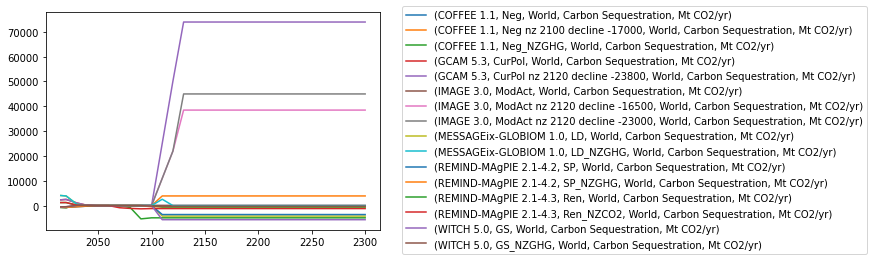

In [32]:
remainder.T.plot()
plt.legend(bbox_to_anchor=(1.05, 1.05))

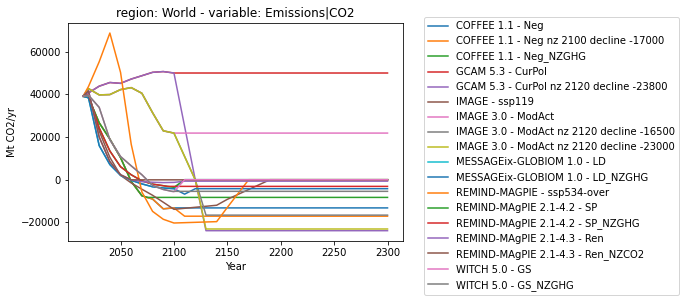

In [33]:
tier1co2.plot(legend=True)
plt.legend(bbox_to_anchor=(1.05, 1.05))

In [34]:
all_seq = remainder.copy()
all_npseq = remainder.copy()
all_npseq.index = all_npseq.index.set_levels([nonpointCS], level="variable")
for year in np.concatenate([[2015], np.arange(2020, 2050, 10)]):
    all_seq[year] = seqexpanded[year]
    all_npseq[year] = npseqexpanded[year]
for year in np.arange(2050, 2301, 10): 
    all_seq[year] += seqexpanded[min(year, 2100)]
    all_npseq[year] += npseqexpanded[min(year, 2100)]
all_seq.head()

2015  \
model      scenario                      region variable             unit                   
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  11.316003   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  11.316003   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  11.316003   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   0.000000   

                                                                                    2020  \
model      scenario                      region variable             unit                  
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  12.06225   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  12.06225   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  12.06225   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr   0.00000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr   0.00000   

                                                                                      2030  \
model      scenario                      region variable             unit                    
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  796.477064   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  796.477064   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  796.477064   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr    0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr    0.000000   

                                                                                       2040  \
model      scenario                      region variable             unit                     
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  3806.347040   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  3806.347040   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  3806.347040   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr     0.000164   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr     0.000164   

                                                                                       2050  \
model      scenario                      region variable             unit                     
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  7195.217774   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  7195.217774   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  7195.217774   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr     0.000202   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr     0.000202   

                                                                                        2060  \
model      scenario                      region variable             unit                      
COFFEE 1.1 Neg                           World  Carbon Sequestration Mt CO2/yr  11477.960125   
           Neg nz 2100 decline -17000    World  Carbon Sequestration Mt CO2/yr  11477.960125   
           Neg_NZGHG                     World  Carbon Sequestration Mt CO2/yr  11477.960125   
GCAM 5.3   CurPol                        World  Carbon Sequestration Mt CO2/yr      0.000663   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration Mt CO2/yr      0.000663   

                                                                                        2070  \
model      scenario         

In [35]:
all_npseq.head()

2015  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   

                                                                                          2020  \
model      scenario                      region variable                       unit              
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr   0.0   

                                                                                                2030  \
model      scenario                      region variable                       unit                    
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr  354.091289   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr    0.000000   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr    0.000000   

                                                                                                  2040  \
model      scenario                      region variable                       unit                      
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  2.623336e+03   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  2.623336e+03   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr  2.623336e+03   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr  7.160000e-09   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr  7.160000e-09   

                                                                                                 2050  \
model      scenario                      region variable                       unit                     
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  4973.727098   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  4973.727098   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr  4973.727098   
GCAM 5.3   CurPol                        World  Carbon Sequestration|Non-point Mt CO2/yr  1588.944770   
           CurPol nz 2120 decline -23800 World  Carbon Sequestration|Non-point Mt CO2/yr  1588.944770   

                                                                                                 2060  \
model      scenario                      region variable                       unit                     
COFFEE 1.1 Neg                           World  Carbon Sequestration|Non-point Mt CO2/yr  8783.283314   
           Neg nz 2100 decline -17000    World  Carbon Sequestration|Non-point Mt CO2/yr  8783.283314   
           Neg_NZGHG                     World  Carbon Sequestration|Non-point Mt CO2/yr

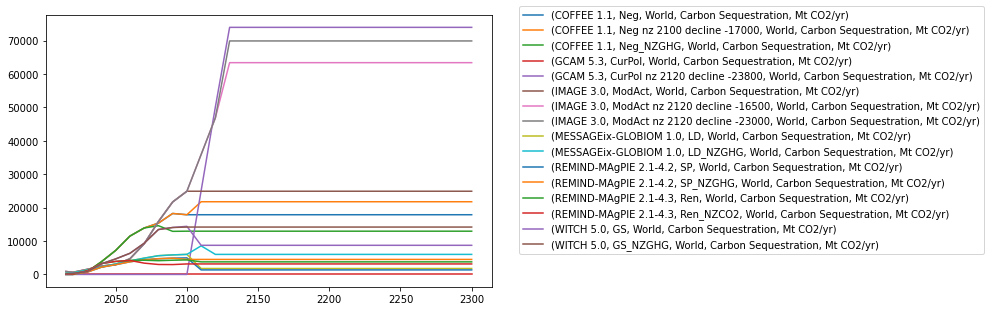

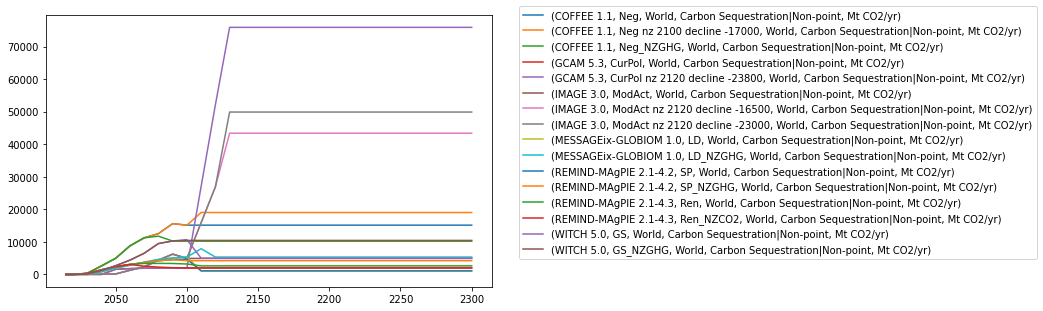

In [36]:
all_seq.T.plot(figsize=(8, 5))
plt.legend(bbox_to_anchor=(1.05, 1.05))
all_npseq.T.plot(figsize=(8, 5))
plt.legend(bbox_to_anchor=(1.05, 1.05))

In [37]:
all_seq.to_csv(f"../output/chosen_files/{version}/carbonCaptureTier1_partial.csv")

In [38]:
all_npseq.to_csv(f"../output/chosen_files/{version}/nonPointCarbonCaptureTier1_partial.csv")